In [99]:
#Importamos algumas bilbiotecas para que possamos fazer a devida analise e a predicao correta dos resultados

#Biblioteca de algebra linear
import numpy as np

#Bilbioteca para visualizacao de arquivos, no caso trabalharemos com arquivos csv
import pandas as pd

#Biblioteca que nos permite a criacao de graficos(como tabelas ou histogramas), para analisar melhor as iformacoes
import matplotlib.pyplot as plt
import seaborn as sns

#Serve pra podermos imprimir esses graficos no proprio ambiente jupyter
%matplotlib inline

#Escolhemos uma estrutura de decisao, no caso escolhemos uma Arvore de Decisaform sklearn.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#Utilizamos essa biblioteca para calcular o erro medio absoluto(mena absolute error)
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [62]:
#Armazenamos o conteudo dos dois arquivos csv nas variaveis train_csv e test_csv
train_csv = pd.read_csv ('/home/pv/Downloads/train.csv')
test_csv = pd.read_csv('/home/pv/Downloads/test.csv')


In [63]:
train_csv.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [64]:
test_csv.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
train_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
test_csv.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [67]:
train_csv.shape

(891, 12)

In [68]:
test_csv.shape

(418, 11)

In [69]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [70]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [71]:
#Vamos eliminar os dados que possuem valores os quais nao podemos trabalhar, NaN, infinito, entre outros
train_csv = train_csv.dropna(axis=0)
test_csv = test_csv.dropna(axis=0)


In [72]:
#Aqui escolhemos nosso alvo para previsao, no caso queremos saber a previsao de sobreviventes e nao sobreviventes
y = train_csv.Survived

In [73]:
#Aqui vamos escolher alguns dos nossos recursos para podermos melhor fazer essa previsao
train_features = ['Pclass', 'Fare']
X = train_csv[train_features]

In [74]:
X.describe()

,Pclass,Fare
count,183.000000,183.000000
mean,1.191257,78.682469
std,0.515187,76.347843
min,1.000000,0.000000
25%,1.000000,29.700000
50%,1.000000,57.000000
75%,1.000000,90.000000
max,3.000000,512.329200


In [75]:
X.head()

,Pclass,Fare
1,1,71.2833
3,1,53.1000
6,1,51.8625
10,3,16.7000
11,1,26.5500


In [76]:
train_model = DecisionTreeRegressor(random_state=1)
train_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [77]:
train_model.predict(X.head())

array([1.        , 0.6       , 0.        , 1.        , 0.57142857])

In [78]:
predicted_train_csv = train_model.predict(X)
mean_absolute_error(y, predicted_train_csv)

0.17301587301587304

In [79]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
train_model = DecisionTreeRegressor()
# Fit model
train_model.fit(train_X, train_y)
# get predicted prices on validation data
val_predictions = train_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.3594202898550724


Text(0.5, 1.0, 'Classe x Sobrevivente')

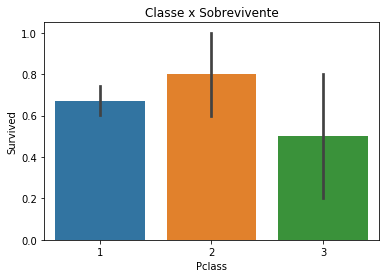

In [80]:
sns.barplot(x = 'Pclass', y= 'Survived', data = train_csv).set_title('Classe x Sobrevivente')

In [151]:
#Baseando na ideia de um dos LeaderShips
#https://www.kaggle.com/xaxetrov/ml-training-our-first-challenge-titanic
predictors = train_csv.drop(["PassengerId"],axis=1)
target = y
x_train,x_validation,y_train,y_validation = train_test_split(predictors,target,test_size=0.25,random_state=1)

In [152]:
#Baseando na ideia de um dos LeaderShips
#https://www.kaggle.com/xaxetrov/ml-training-our-first-challenge-titanic
model = LogisticRegression(random_state=1, multi_class='ovr', solver='liblinear')
model.fit(train_X, train_y)

pred_y = model.predict(val_X)

print (accuracy_score(pred_y, val_y))

0.8043478260869565


In [160]:
contador = 0
while(contador < pred_y.all()):
    contador = contador + 1
PassengerId = contador

In [161]:
arquivo = pd.DataFrame({"PasengerId" : PassengerId, "Survived" : pred_y})
arquivo.to_csv("Submission.csv",index=False)